In [4]:
import pandas as pd

df = pd.read_csv("cs_number.csv")
df

,Unnamed: 0,dataset,folds,fold_index,random_state,config_file_name,metric,wall_time_limit_in_s,debug,bo_n_warm_start,...,is_trim_sp,n_high_performing_model,n_samples_for_each_model,hpo_opt_method,max_samples,n_exploration,data_sample_method,data_sample_rate,hpc,n_cs
0,0,dresses-sales,5,0,42,c06_hp_pruning_ratio.yaml,roc_auc,NaN,False,NaN,...,False,1,NaN,rs,NaN,NaN,random,1,NaN,16
1,1,dresses-sales,5,0,42,c06_hp_pruning_ratio.yaml,roc_auc,NaN,False,NaN,...,False,2,NaN,rs,NaN,NaN,random,1,NaN,24
2,2,dresses-sales,5,0,42,c06_hp_pruning_ratio.yaml,roc_auc,NaN,False,NaN,...,False,3,NaN,rs,NaN,NaN,random,1,NaN,33
3,3,dresses-sales,5,0,42,c06_hp_pruning_ratio.yaml,roc_auc,NaN,False,NaN,...,False,4,NaN,rs,NaN,NaN,random,1,NaN,37
4,4,dresses-sales,5,0,42,c06_hp_pruning_ratio.yaml,roc_auc,NaN,False,NaN,...,False,5,NaN,rs,NaN,NaN,random,1,NaN,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,3355,diabetes,5,4,42,c06_hp_pruning_ratio.yaml,accuracy,NaN,False,NaN,...,False,10,NaN,hyperband,NaN,NaN,random,1,NaN,69
3356,3356,diabetes,5,4,42,c06_hp_pruning_ratio.yaml,accuracy,NaN,False,NaN,...,False,11,NaN,hyperband,NaN,NaN,random,1,NaN,71
3357,3357,diabetes,5,4,42,c06_hp_pruning_ratio.yaml,accuracy,NaN,False,NaN,...,False,12,NaN,hyperband,NaN,NaN,random,1,NaN,79
3358,3358,diabetes,5,4,42,c06_hp_pruning_ratio.yaml,accuracy,NaN,False,NaN,...,False,13,NaN,hyperband,NaN,NaN,random,1,NaN,81


In [5]:

df[df['n_high_performing_model'] == 1]['n_cs'].mean()

13.375

In [6]:
# ID202410231123979763473
output = df.groupby("n_high_performing_model")['n_cs'].mean().reset_index()
output["n_cs"] = output['n_cs'].astype('int')
output.to_latex("cs_size.tex", index=False)
output


/var/folders/54/yfpyqg4s5tv611l2_321343c0000gn/T/ipykernel_4022/2944076261.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  output.to_latex("cs_size.tex", index=False)


,n_high_performing_model,n_cs
0,1,13
1,2,21
2,3,30
3,4,37
4,5,45
5,6,50
6,7,55
7,8,61
8,9,65
9,10,71


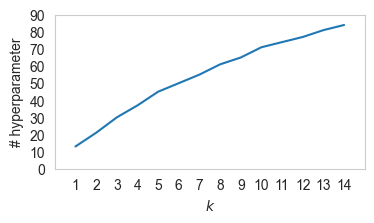

In [7]:
# ID2024112716531314924342
from matplotlib import pyplot as plt, ticker
import seaborn as sns

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)
sns.lineplot(output, x="n_high_performing_model", y="n_cs", ax=ax)
# ax.set_xticklabels(range(1, 14 + 1))
# ax.set_ylim(0,84)
ax.yaxis.set_major_formatter(lambda x, pos: int(x))
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=10))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.set_xlim(0, 15)
ax.set_ylim(0, 90)
ax.set_ylabel("# hyperparameter")
ax.set_xlabel("$k$")
ax.grid(False)
fig.savefig("n_hyperparameter_over_atop_n.pdf", bbox_inches="tight")

In [8]:
output

,n_high_performing_model,n_cs
0,1,13
1,2,21
2,3,30
3,4,37
4,5,45
5,6,50
6,7,55
7,8,61
8,9,65
9,10,71
